In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?

In [11]:
# # YOUR CODE SHOULD START HERE
# # YOUR CODE SHOULD END HERE
# import tensorflow as tf
# mnist = tf.keras.datasets.mnist

# (x_train, y_train),(x_test, y_test) = mnist.load_data()
# # YOUR CODE SHOULD START HERE

# # YOUR CODE SHOULD END HERE
# model = tf.keras.models.Sequential([
# # YOUR CODE SHOULD START HERE

# # YOUR CODE SHOULD END HERE
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # YOUR CODE SHOULD START HERE
# # YOUR CODE SHOULD END HERE


# ----------------my code -------------------------
# importing the libraries
import tensorflow as tf
from tensorflow import keras

# loading the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# # Visualizing the dataset
# import matplotlib.pyplot as plt
# plt.imshow(train_images[0])

# print(train_labels[0])
# print(train_images[0])

# print(train_images.shape)
# print(train_labels.shape)
# print(test_images.shape)


# normalization of the dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# defining the model
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# training
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

# testing
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test results loss and accuracy:", test_loss, test_accuracy, sep="; ")

# prediction
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])


Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2010 - accuracy: 0.9404
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0522 - accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0356 - accuracy: 0.9894
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9908
Reached 99% accuracy so cancelling training!
313/313 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9817
Test results loss and accuracy:; 0.058437980711460114; 0.9817000031471252
313/313 [==============================] - 1s 3ms/step
[1.1876793e-08 1.9298938e-09 9.7845444e-08 3.2088959e-05 8.4902640e-12
 5.6157563e-09 3.5876727e-13 9.9996442e-01 3.8596717e-09 3.3107654e-06]
7


7


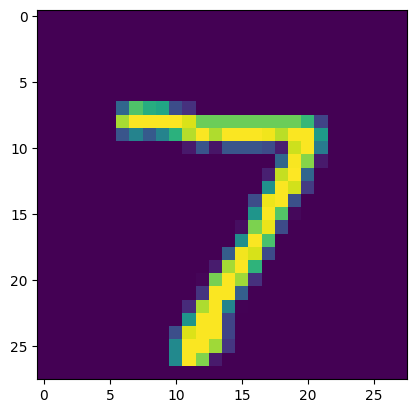

In [12]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0])
print(test_labels[0])